<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Statistics (a)

## Normality Tests

### Benchmark Case

In [1]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

/Users/steelealexander/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    
    Parameters
    ==========
    S0: float
        initial stock/index value
    r: float
        constant short rate
    sigma: float
        constant volatility
    T: float
        final time horizon
    M: int
        number of time steps/intervals
    I: int
        number of paths to be simulated
        
    Returns
    =======
    paths: ndarray, shape (M + 1, I)
        simulated paths given the parameters
    '''
    dt = T / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()  
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * math.sqrt(dt) * rand)  
    return paths

In [4]:
S0 = 100.  
r = 0.05  
sigma = 0.2  
T = 1.0   
M = 50  
I = 250000  
np.random.seed(1000)

In [5]:
paths = gen_paths(S0, r, sigma, T, M, I)

In [6]:
S0 * math.exp(r * T)  

105.12710963760242

In [7]:
paths[-1].mean()  

105.12645392478755

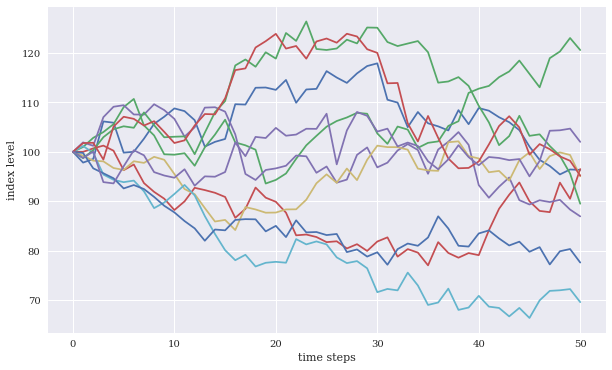

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('time steps')
plt.ylabel('index level');
# plt.savefig('../../images/ch13/stat_01.png');

In [9]:
paths[:, 0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [10]:
log_returns = np.log(paths[1:] / paths[:-1]) 

In [11]:
log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [12]:
import warnings; warnings.simplefilter('ignore')

In [13]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

In [14]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


In [15]:
log_returns.mean() * M + 0.5 * sigma ** 2  

0.05000000000000005

In [16]:
log_returns.std() * math.sqrt(M)  

0.20000000000000015

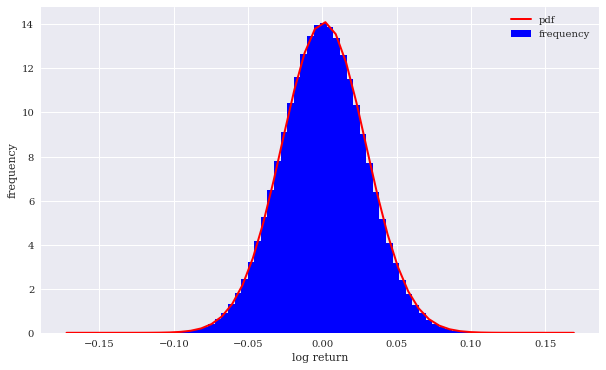

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, density=True,
         label='frequency', color='b')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),
         'r', lw=2.0, label='pdf')  
plt.legend();
# plt.savefig('../../images/ch13/stat_02.png');

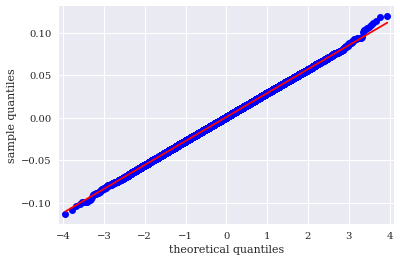

In [18]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');
# plt.savefig('../../images/ch13/stat_03.png');

In [19]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print('Skew of data set  %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of data set  %14.3f' % scs.kurtosis(arr))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

In [20]:
normality_tests(log_returns.flatten())  

Skew of data set           0.001
Skew test p-value          0.430
Kurt of data set           0.001
Kurt test p-value          0.541
Norm test p-value          0.607


Text(0.5, 1.0, 'log data')

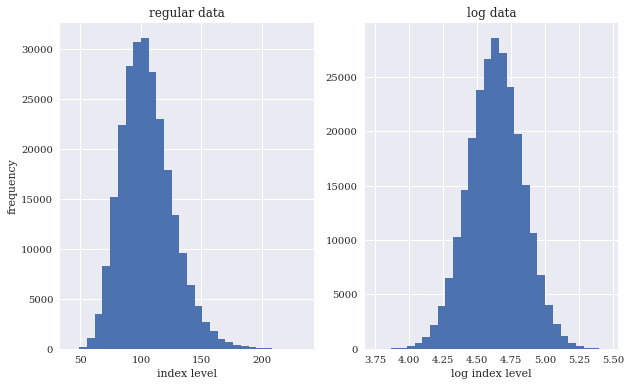

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(paths[-1], bins=30)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.set_xlabel('log index level')
ax2.set_title('log data')
# plt.savefig('../../images/ch13/stat_04.png');

In [22]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [23]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [24]:
normality_tests(np.log(paths[-1]))

Skew of data set          -0.001
Skew test p-value          0.851
Kurt of data set          -0.003
Kurt test p-value          0.744
Norm test p-value          0.931


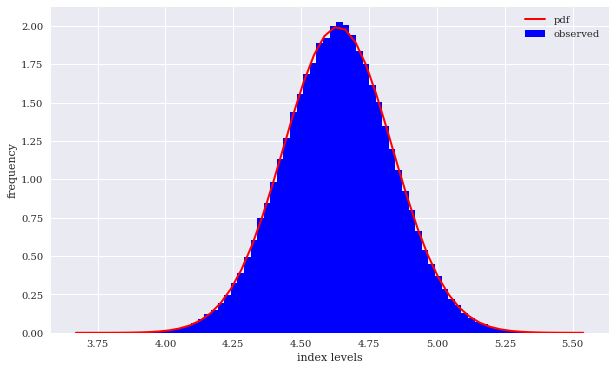

In [25]:
plt.figure(figsize=(10, 6))
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, density=True,
         label='observed', color='b')
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
         'r', lw=2.0, label='pdf')
plt.legend();
# plt.savefig('../../images/ch13/stat_05.png');

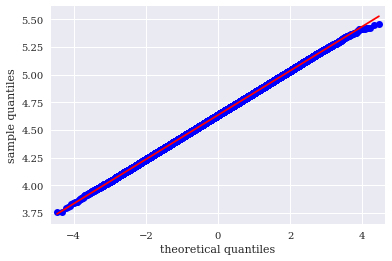

In [26]:
sm.qqplot(log_data, line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');
# plt.savefig('../../images/ch13/stat_06.png');

### Real World Data

In [27]:
import pandas as pd

In [28]:
raw = pd.read_csv('../../source/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True).dropna()

In [29]:
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']

In [30]:
data = raw[symbols]
data = data.dropna()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     2138 non-null   float64
 1   GLD     2138 non-null   float64
 2   AAPL.O  2138 non-null   float64
 3   MSFT.O  2138 non-null   float64
dtypes: float64(4)
memory usage: 83.5 KB


In [32]:
data.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660


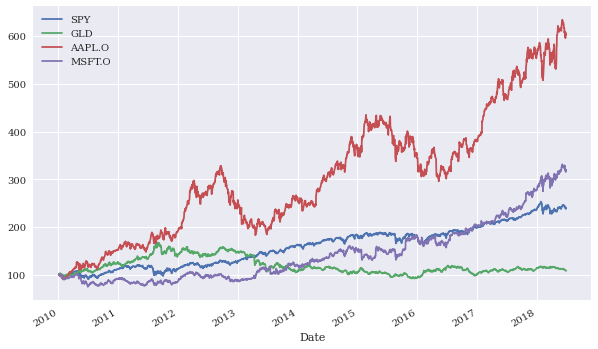

In [33]:
(data / data.iloc[0] * 100).plot(figsize=(10, 6))
# plt.savefig('../../images/ch13/stat_07.png');

In [34]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807


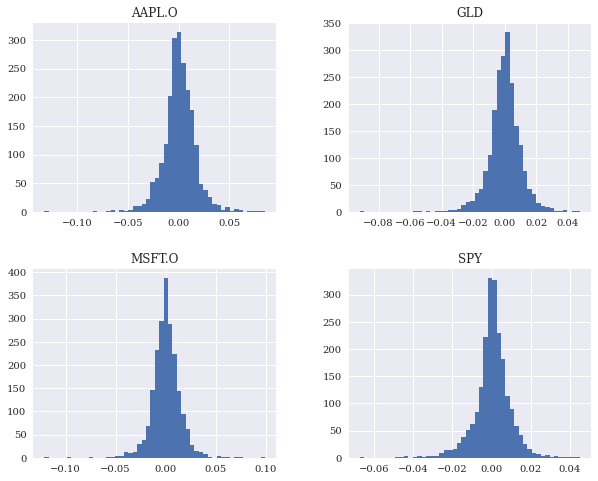

In [35]:
log_returns.hist(bins=50, figsize=(10, 8));
# plt.savefig('../../images/ch13/stat_08.png');

In [36]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)  


Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      2137.00000
           min        -0.06734
           max         0.04545
          mean         0.00041
           std         0.00933
          skew        -0.52189
      kurtosis         4.52432

Results for symbol GLD
------------------------------
     statistic           value
------------------------------
          size      2137.00000
           min        -0.09191
           max         0.04795
          mean         0.00004
           std         0.01020
          skew        -0.59934
      kurtosis         5.68423

Results for symbol AAPL.O
------------------------------
     statistic           value
------------------------------
          size      2137.00000
           min        -0.13187
           max         0.08502
          mean         0.00084
           std         0.01591
          skew        -0.23510
      kurtosis         4.7

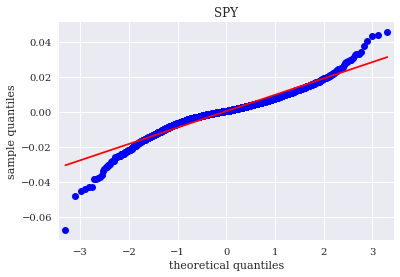

In [37]:
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');
# plt.savefig('../../images/ch13/stat_09.png');

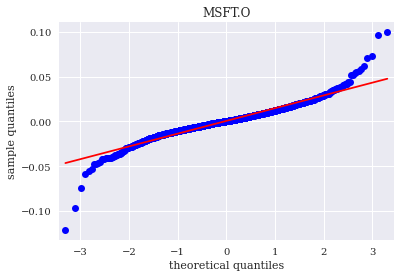

In [38]:
sm.qqplot(log_returns['MSFT.O'].dropna(), line='s')
plt.title('MSFT.O')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');
# plt.savefig('../../images/ch13/stat_10.png');

In [39]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(32 * '-')
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)  


Results for symbol SPY
--------------------------------
Skew of data set          -0.522
Skew test p-value          0.000
Kurt of data set           4.524
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GLD
--------------------------------
Skew of data set          -0.599
Skew test p-value          0.000
Kurt of data set           5.684
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol AAPL.O
--------------------------------
Skew of data set          -0.235
Skew test p-value          0.000
Kurt of data set           4.790
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT.O
--------------------------------
Skew of data set          -0.091
Skew test p-value          0.085
Kurt of data set           7.291
Kurt test p-value          0.000
Norm test p-value          0.000


## Portfolio Optimization

### The Data

In [40]:
symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD']  

In [41]:
noa = len(symbols)  

In [42]:
data = raw[symbols]

In [43]:
rets = np.log(data / data.shift(1))

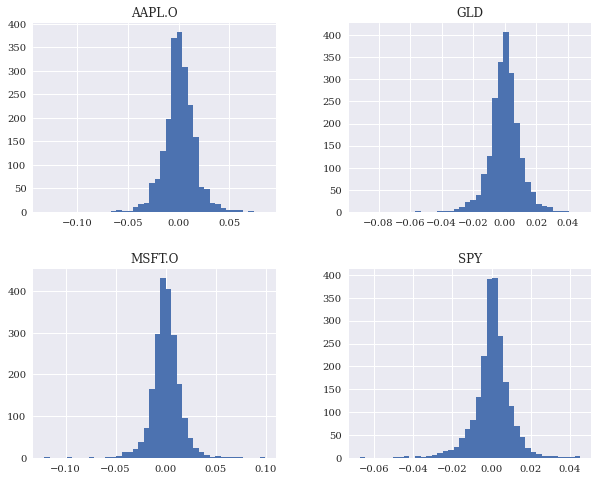

In [44]:
rets.hist(bins=40, figsize=(10, 8));
# plt.savefig('../../images/ch13/stat_11.png')

In [45]:
rets.mean() * 252  

AAPL.O    0.212359
MSFT.O    0.136648
SPY       0.102928
GLD       0.009141
dtype: float64

In [46]:
rets.cov() * 252  

,AAPL.O,MSFT.O,SPY,GLD
AAPL.O,0.063773,0.023427,0.021039,0.001513
MSFT.O,0.023427,0.050917,0.022244,-0.000347
SPY,0.021039,0.022244,0.021939,0.000062
GLD,0.001513,-0.000347,0.000062,0.026209


### The Basic Theory

In [47]:
weights = np.random.random(noa)  
weights /= np.sum(weights)  

In [48]:
weights

array([0.07650728, 0.06021919, 0.63364218, 0.22963135])

In [49]:
weights.sum()

1.0

In [50]:
np.sum(rets.mean() * weights) * 252  

0.09179459482057793

In [51]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))  

0.014763288666485574

In [52]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))  

0.12150427427249452

In [53]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [54]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [55]:
prets = []
pvols = []
for p in range (2500):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)

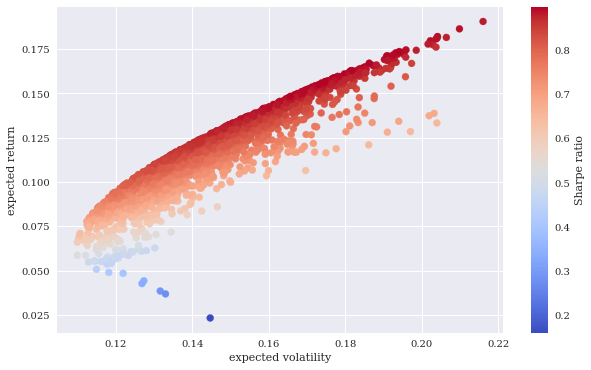

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');
# plt.savefig('../../images/ch13/stat_12.png')

### Portfolio Optimizations

In [57]:
import scipy.optimize as sco

In [58]:
def min_func_sharpe(weights):  
    return -port_ret(weights) / port_vol(weights)  

In [59]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

In [60]:
bnds = tuple((0, 1) for x in range(noa))  

In [61]:
eweights = np.array(noa * [1. / noa,])  
eweights  

array([0.25, 0.25, 0.25, 0.25])

In [62]:
min_func_sharpe(eweights)

-0.8436203363155397

In [63]:
%%time
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

CPU times: user 56.7 ms, sys: 2.39 ms, total: 59.1 ms
Wall time: 59.3 ms


In [64]:
opts  

     fun: -0.8976673894052725
     jac: array([ 8.96826386e-05,  8.30739737e-05, -2.45958567e-04,  1.92895532e-05])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.51191354, 0.19126414, 0.25454109, 0.04228123])

In [65]:
opts['x'].round(3)  

array([0.512, 0.191, 0.255, 0.042])

In [66]:
port_ret(opts['x']).round(3)  

0.161

In [67]:
port_vol(opts['x']).round(3)  

0.18

In [68]:
port_ret(opts['x']) / port_vol(opts['x'])  

0.8976673894052725

In [69]:
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

In [70]:
optv

     fun: 0.1094215526341138
     jac: array([0.11098004, 0.10948556, 0.10939826, 0.10944918])
 message: 'Optimization terminated successfully.'
    nfev: 54
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.62630326e-18, 1.06170720e-03, 5.43263079e-01, 4.55675214e-01])

In [71]:
optv['x'].round(3)

array([0.   , 0.001, 0.543, 0.456])

In [72]:
port_vol(optv['x']).round(3)

0.109

In [73]:
port_ret(optv['x']).round(3)

0.06

In [74]:
port_ret(optv['x']) / port_vol(optv['x'])

0.5504173653075624

### Efficient Frontier

In [75]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

In [76]:
bnds = tuple((0, 1) for x in weights)

In [77]:
%%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
                       bounds=bnds, constraints=cons)  
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 2.72 s, sys: 10.4 ms, total: 2.73 s
Wall time: 2.75 s


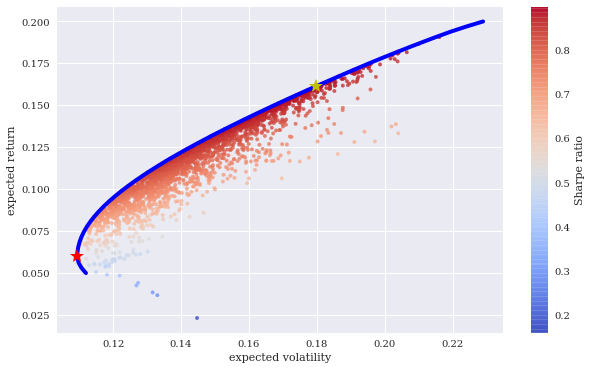

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
         'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
         'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# plt.savefig('../../images/ch13/stat_13.png')

### Capital Market Line

In [79]:
import scipy.interpolate as sci

In [80]:
ind = np.argmin(tvols)  
evols = tvols[ind:]  
erets = trets[ind:]  

In [81]:
tck = sci.splrep(evols, erets)  

In [82]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [83]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]  
    eq2 = rf + p[1] * p[2] - f(p[2])  
    eq3 = p[1] - df(p[2])  
    return eq1, eq2, eq3

In [84]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])  

In [85]:
opt  

array([0.01      , 0.84470952, 0.19525391])

In [86]:
np.round(equations(opt), 6)  

array([ 0.,  0., -0.])

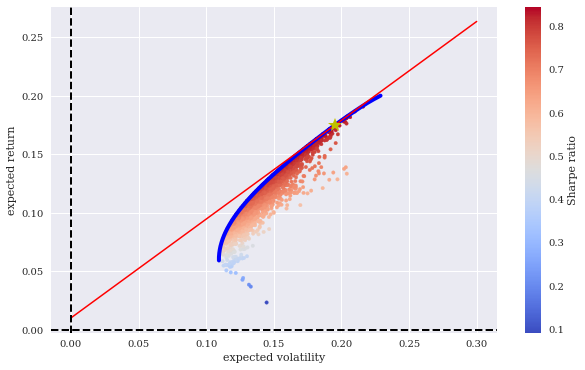

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,
            marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# plt.savefig('../../images/ch13/stat_14.png')

In [88]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
res = sco.minimize(port_vol, eweights, method='SLSQP',
                   bounds=bnds, constraints=cons)

In [89]:
res['x'].round(3)  

array([0.59 , 0.221, 0.189, 0.   ])

In [90]:
port_ret(res['x'])

0.1749328414905194

In [91]:
port_vol(res['x'])

0.19525371793918325

In [92]:
port_ret(res['x']) / port_vol(res['x'])

0.8959257899765407

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>